In [1]:
import pandas as pd
import data_loader as dl
import seaborn as sns
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

RDKit WARNING: [11:42:12] Enabling RDKit 2019.09.3 jupyter extensions


# Here's the basic flow of this code:
- Load data for all files
- Filter based on retention time gradient
- Calculate intensity range: 
        mean of top3 annotated peaks / mean of bottom 3 annotated peaks
- Separate good and mediocre spectra. 
        Good <= .01. Mediocre >.02 and <=.2
- For each file combine intensity range information that occurs on identical peptide: 
        For example YYBB might occur more than once and have an intensity range of 6 for one and 9 for the other We'll combine it to be YYBB: 6, 9. Later w'll take the average
- Join all replicate files together based on peptide
        Outer join based on peptide. So if File 1 had YYBB: 6,9 and file 2 had YYBB: 9 they would get combined to be YYBB: 6,9,9 
- Find the mean of all intensity ranges for each peptide. 
        Continuing with the example from above YYBB: 8
        
- Find the ratio of bulk mean intensity difference / sc mean intensity difference.
- Finally, we plot 

In [2]:
def get_intensities(row):
    intensities = []
    line = row["Matched Ion Intensities"].split(";")
        
    for el in line:
        el = el.strip('][').split(",")
        for sub_el in el:
            sub_el = sub_el.split(":")[1]
            intensities.append(sub_el)
    return intensities

In [3]:
def get_top3(row):
    row['ann_intensities'].sort(key=int, reverse=True)

    return3 = row['ann_intensities'][:3]
    return3 = [float(i) for i in return3]
    
    return return3

In [4]:
def get_bottom3(row):
    row['ann_intensities'].sort(key=int, reverse=True)

    return3 = row['ann_intensities'][-3:]
    return3 = [float(i) for i in return3]
        
    return return3

In [5]:
def calc_intensity_diff(row):
    intensity_diff = st.mean(row["top3"])/st.mean(row["bottom3"])
    return intensity_diff

In [6]:
def get_intensity_diff(df):  
    df["ann_intensities"] = df.apply(get_intensities, axis=1)
    df["top3"] = df.apply(get_top3, axis=1)
    df["bottom3"] = df.apply(get_bottom3, axis=1)
    df['intensity_diff'] = df.apply(calc_intensity_diff, axis=1)

    return df

# Get Data

In [7]:
#Read in data
bulk_rep1 = dl.load_joined_psm_mzml('bulk_rep1')[['peptide','minute','Matched Ion Intensities','probability']]
bulk_rep2 = dl.load_joined_psm_mzml('bulk_rep2')[['peptide','minute','Matched Ion Intensities','probability']]
bulk_rep3 = dl.load_joined_psm_mzml('bulk_rep3')[['peptide','minute','Matched Ion Intensities','probability']]

rep1_2ng = dl.load_joined_psm_mzml("2ng_rep1")[['peptide','minute','Matched Ion Intensities','probability']]
rep2_2ng = dl.load_joined_psm_mzml("2ng_rep2")[['peptide','minute','Matched Ion Intensities','probability']]
rep3_2ng = dl.load_joined_psm_mzml("2ng_rep3")[['peptide','minute','Matched Ion Intensities','probability']]
rep4_2ng = dl.load_joined_psm_mzml("2ng_rep4")[['peptide','minute','Matched Ion Intensities','probability']]
rep5_2ng = dl.load_joined_psm_mzml("2ng_rep5")[['peptide','minute','Matched Ion Intensities','probability']]
rep6_2ng = dl.load_joined_psm_mzml("2ng_rep6")[['peptide','minute','Matched Ion Intensities','probability']]

rep1_02ng = dl.load_joined_psm_mzml("0.2ng_rep1")[['peptide','minute','Matched Ion Intensities','probability']]
rep2_02ng = dl.load_joined_psm_mzml("0.2ng_rep2")[['peptide','minute','Matched Ion Intensities','probability']]
rep3_02ng = dl.load_joined_psm_mzml("0.2ng_rep3")[['peptide','minute','Matched Ion Intensities','probability']]
rep4_02ng = dl.load_joined_psm_mzml("0.2ng_rep4")[['peptide','minute','Matched Ion Intensities','probability']]
rep5_02ng = dl.load_joined_psm_mzml("0.2ng_rep5")[['peptide','minute','Matched Ion Intensities','probability']]
rep6_02ng = dl.load_joined_psm_mzml("0.2ng_rep6")[['peptide','minute','Matched Ion Intensities','probability']]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,20,21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt

In [8]:
#filter based on retention time gradient
rep1_2ng = rep1_2ng[(rep1_2ng['minute'] < 95) & (rep1_2ng['minute'] >= 27)]
rep2_2ng = rep2_2ng[(rep2_2ng['minute'] < 95) & (rep2_2ng['minute'] >=27)]
rep3_2ng = rep3_2ng[(rep3_2ng['minute'] < 93) & (rep3_2ng['minute'] >=32)]
rep4_2ng = rep4_2ng[(rep4_2ng['minute'] < 91) & (rep4_2ng['minute'] >=32)]
rep5_2ng = rep5_2ng[(rep5_2ng['minute'] < 99) & (rep5_2ng['minute'] >=31)]
rep6_2ng = rep6_2ng[(rep6_2ng['minute'] < 98) & (rep6_2ng['minute'] >=31)]

rep1_02ng = rep1_02ng[(rep1_02ng['minute'] < 94) & (rep1_02ng['minute'] >=28)]
rep2_02ng = rep2_02ng[(rep2_02ng['minute'] < 95) & (rep2_02ng['minute'] >=27)]
rep3_02ng = rep3_02ng[(rep3_02ng['minute'] < 98) & (rep3_02ng['minute'] >=32)]
rep4_02ng = rep4_02ng[(rep4_02ng['minute'] < 98) & (rep4_02ng['minute'] >=32)]
rep5_02ng = rep5_02ng[(rep5_02ng['minute'] < 109) & (rep5_02ng['minute'] >=35)]
rep6_02ng = rep6_02ng[(rep6_02ng['minute'] < 109) & (rep6_02ng['minute'] >=35)]

In [9]:
#calculate intensities difference
bulk_rep1 = get_intensity_diff(bulk_rep1)
bulk_rep2 = get_intensity_diff(bulk_rep2)
bulk_rep3 = get_intensity_diff(bulk_rep3)

rep1_2ng = get_intensity_diff(rep1_2ng)
rep2_2ng = get_intensity_diff(rep2_2ng)
rep3_2ng = get_intensity_diff(rep3_2ng)
rep4_2ng = get_intensity_diff(rep4_2ng)
rep5_2ng = get_intensity_diff(rep5_2ng)
rep6_2ng = get_intensity_diff(rep6_2ng)

rep1_02ng = get_intensity_diff(rep1_02ng)
rep2_02ng = get_intensity_diff(rep2_02ng)
rep3_02ng = get_intensity_diff(rep3_02ng)
rep4_02ng = get_intensity_diff(rep4_02ng)
rep5_02ng = get_intensity_diff(rep5_02ng)
rep6_02ng = get_intensity_diff(rep6_02ng)

In [10]:
#seprate good and medicore spectra
bulk_rep1_good = bulk_rep1[bulk_rep1['probability'] <= .01][['peptide','intensity_diff']]
bulk_rep2_good = bulk_rep2[bulk_rep2['probability'] <= .01][['peptide','intensity_diff']]
bulk_rep3_good = bulk_rep3[bulk_rep3['probability'] <= .01][['peptide','intensity_diff']]

rep1_2ng_good = rep1_2ng[rep1_2ng['probability'] <= .01][['peptide','intensity_diff']]
rep2_2ng_good = rep2_2ng[rep2_2ng['probability'] <= .01][['peptide','intensity_diff']]
rep3_2ng_good = rep3_2ng[rep3_2ng['probability'] <= .01][['peptide','intensity_diff']]
rep4_2ng_good = rep4_2ng[rep4_2ng['probability'] <= .01][['peptide','intensity_diff']]
rep5_2ng_good = rep5_2ng[rep5_2ng['probability'] <= .01][['peptide','intensity_diff']]
rep6_2ng_good = rep6_2ng[rep6_2ng['probability'] <= .01][['peptide','intensity_diff']]

rep1_02ng_good = rep1_02ng[rep1_02ng['probability'] <= .01][['peptide','intensity_diff']]
rep2_02ng_good = rep2_02ng[rep2_02ng['probability'] <= .01][['peptide','intensity_diff']]
rep3_02ng_good = rep3_02ng[rep3_02ng['probability'] <= .01][['peptide','intensity_diff']]
rep4_02ng_good = rep4_02ng[rep4_02ng['probability'] <= .01][['peptide','intensity_diff']]
rep5_02ng_good = rep5_02ng[rep5_02ng['probability'] <= .01][['peptide','intensity_diff']]
rep6_02ng_good = rep6_02ng[rep6_02ng['probability'] <= .01][['peptide','intensity_diff']]

rep1_2ng_med = rep1_2ng[(rep1_2ng['probability'] > .01) & (rep1_2ng['probability'] <= .2)][['peptide','intensity_diff']]
rep2_2ng_med = rep2_2ng[(rep2_2ng['probability'] > .01) & (rep2_2ng['probability'] <= .2)][['peptide','intensity_diff']]
rep3_2ng_med = rep3_2ng[(rep3_2ng['probability'] > .01) & (rep3_2ng['probability'] <= .2)][['peptide','intensity_diff']]
rep4_2ng_med = rep4_2ng[(rep4_2ng['probability'] > .01) & (rep4_2ng['probability'] <= .2)][['peptide','intensity_diff']]
rep5_2ng_med = rep5_2ng[(rep5_2ng['probability'] > .01) & (rep5_2ng['probability'] <= .2)][['peptide','intensity_diff']]
rep6_2ng_med = rep6_2ng[(rep6_2ng['probability'] > .01) & (rep6_2ng['probability'] <= .2)][['peptide','intensity_diff']]

rep1_02ng_med = rep1_02ng[(rep1_02ng['probability'] > .01) & (rep1_02ng['probability'] <= .2)][['peptide','intensity_diff']]
rep2_02ng_med = rep2_02ng[(rep2_02ng['probability'] > .01) & (rep2_02ng['probability'] <= .2)][['peptide','intensity_diff']]
rep3_02ng_med = rep3_02ng[(rep3_02ng['probability'] > .01) & (rep3_02ng['probability'] <= .2)][['peptide','intensity_diff']]
rep4_02ng_med = rep4_02ng[(rep4_02ng['probability'] > .01) & (rep4_02ng['probability'] <= .2)][['peptide','intensity_diff']]
rep5_02ng_med = rep5_02ng[(rep5_02ng['probability'] > .01) & (rep5_02ng['probability'] <= .2)][['peptide','intensity_diff']]
rep6_02ng_med = rep6_02ng[(rep6_02ng['probability'] > .01) & (rep6_02ng['probability'] <= .2)][['peptide','intensity_diff']]



In [11]:
#for each file get the intensity difference for each time a peptide is seen
bulk_rep1_good = bulk_rep1_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep2_good = bulk_rep2_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep3_good = bulk_rep3_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_good = rep1_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_good = rep2_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_good = rep3_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_good = rep4_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_good = rep5_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_good = rep6_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_med = rep1_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_med = rep2_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_med = rep3_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_med = rep4_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_med = rep5_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_med = rep6_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_good = rep1_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_good = rep2_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_good = rep3_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_good = rep4_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_good = rep5_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_good = rep6_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_med = rep1_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_med = rep2_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_med = rep3_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_med = rep4_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_med = rep5_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_med = rep6_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()


In [12]:
#change index to be peptide
bulk_rep1_good = bulk_rep1_good.set_index("peptide")
bulk_rep2_good = bulk_rep2_good.set_index("peptide")
bulk_rep3_good = bulk_rep3_good.set_index("peptide")

rep1_2ng_good = rep1_2ng_good.set_index("peptide")
rep2_2ng_good = rep2_2ng_good.set_index("peptide")
rep3_2ng_good = rep3_2ng_good.set_index("peptide")
rep4_2ng_good = rep4_2ng_good.set_index("peptide")
rep5_2ng_good = rep5_2ng_good.set_index("peptide")
rep6_2ng_good = rep6_2ng_good.set_index("peptide")

rep1_2ng_med = rep1_2ng_med.set_index("peptide")
rep2_2ng_med = rep2_2ng_med.set_index("peptide")
rep3_2ng_med = rep3_2ng_med.set_index("peptide")
rep4_2ng_med = rep4_2ng_med.set_index("peptide")
rep5_2ng_med = rep5_2ng_med.set_index("peptide")
rep6_2ng_med = rep6_2ng_med.set_index("peptide")

rep1_02ng_good = rep1_02ng_good.set_index("peptide")
rep2_02ng_good = rep2_02ng_good.set_index("peptide")
rep3_02ng_good = rep3_02ng_good.set_index("peptide")
rep4_02ng_good = rep4_02ng_good.set_index("peptide")
rep5_02ng_good = rep5_02ng_good.set_index("peptide")
rep6_02ng_good = rep6_02ng_good.set_index("peptide")

rep1_02ng_med = rep1_02ng_med.set_index("peptide")
rep2_02ng_med = rep2_02ng_med.set_index("peptide")
rep3_02ng_med = rep3_02ng_med.set_index("peptide")
rep4_02ng_med = rep4_02ng_med.set_index("peptide")
rep5_02ng_med = rep5_02ng_med.set_index("peptide")
rep6_02ng_med = rep6_02ng_med.set_index("peptide")

In [13]:
#merge
#from here on bulk has been filtered for quality scans
bulk_allreps = pd.concat([bulk_rep1_good, bulk_rep2_good], join='outer')
bulk_allreps = pd.concat([bulk_allreps, bulk_rep3_good], join='outer')

allreps_2ng_good = pd.concat([rep1_2ng_good, rep2_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep3_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep4_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep5_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep6_2ng_good], join='outer')

allreps_02ng_good = pd.concat([rep1_02ng_good, rep2_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep3_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep4_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep5_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep6_02ng_good], join='outer')

allreps_2ng_med = pd.concat([rep1_2ng_med, rep2_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep3_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep4_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep5_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep6_2ng_med], join='outer')

allreps_02ng_med = pd.concat([rep1_02ng_med, rep2_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep3_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep4_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep5_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep6_02ng_med], join='outer')

In [14]:
bulk_allreps = bulk_allreps.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_good = allreps_2ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_med = allreps_2ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_good = allreps_02ng_good.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_med = allreps_02ng_med.groupby(['peptide'])['intensity_diff'].apply(lambda x: ','.join(x.astype(str))).reset_index()


In [15]:
def calc_aver_inten_diff(row):
    all_counts = row['intensity_diff']
    all_counts = all_counts.split(',')
    all_counts = list(map(float, all_counts))
    count_mean = np.nanmean(all_counts)
    return count_mean

In [16]:
bulk_allreps['mean_inten_diff'] = bulk_allreps.apply(calc_aver_inten_diff, axis=1)
allreps_2ng_good['mean_inten_diff'] = allreps_2ng_good.apply(calc_aver_inten_diff, axis=1)
allreps_2ng_med['mean_inten_diff'] = allreps_2ng_med.apply(calc_aver_inten_diff, axis=1)
allreps_02ng_good['mean_inten_diff'] = allreps_02ng_good.apply(calc_aver_inten_diff, axis=1)
allreps_02ng_med['mean_inten_diff'] = allreps_02ng_med.apply(calc_aver_inten_diff, axis=1)


In [17]:
bulk_allreps = bulk_allreps.set_index("peptide")
allreps_2ng_good = allreps_2ng_good.set_index("peptide")
allreps_2ng_med = allreps_2ng_med.set_index("peptide")
allreps_02ng_good = allreps_02ng_good.set_index("peptide")
allreps_02ng_med = allreps_02ng_med.set_index("peptide")

In [18]:
#outer join all together based on peptide
bulk_allreps.columns = [str(col) + '_bulk' for col in bulk_allreps.columns]
allreps_2ng_good.columns = [str(col) + '_2ng_good' for col in allreps_2ng_good.columns]
allreps_2ng_med.columns = [str(col) + '_2ng_med' for col in allreps_2ng_med.columns]
allreps_02ng_good.columns = [str(col) + '_0.2ng_good' for col in allreps_02ng_good.columns]
allreps_02ng_med.columns = [str(col) + '_0.2ng_med' for col in allreps_02ng_med.columns]

megatable = pd.concat([bulk_allreps, allreps_2ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_2ng_med], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_med], axis=1, join='outer')

In [35]:
df_2ng_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_2ng_good']]
df_2ng_good['2ng quality'] = df_2ng_good['mean_inten_diff_bulk']/df_2ng_good['mean_inten_diff_2ng_good']

df_2ng_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_2ng_med']]
df_2ng_med['2ng mediocre'] = df_2ng_med['mean_inten_diff_bulk']/df_2ng_med['mean_inten_diff_2ng_med']

df_02ng_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_0.2ng_good']]
df_02ng_good['0.2ng quality'] = df_02ng_good['mean_inten_diff_bulk']/df_02ng_good['mean_inten_diff_0.2ng_good']

df_02ng_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_0.2ng_med']]
df_02ng_med['0.2ng mediocre'] = df_02ng_med['mean_inten_diff_bulk']/df_02ng_med['mean_inten_diff_0.2ng_med']


kde_df = pd.concat([df_2ng_good[['2ng quality']],df_02ng_good[['0.2ng quality']]], axis=1)
kde_df = pd.concat([kde_df, df_2ng_med[['2ng mediocre']]], axis=1)
kde_df = pd.concat([kde_df, df_02ng_med[['0.2ng mediocre']]], axis=1)

<ipython-input-35-423f0ce44484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2ng_good['2ng quality'] = df_2ng_good['mean_inten_diff_bulk']/df_2ng_good['mean_inten_diff_2ng_good']
<ipython-input-35-423f0ce44484>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2ng_med['2ng mediocre'] = df_2ng_med['mean_inten_diff_bulk']/df_2ng_med['mean_inten_diff_2ng_med']
<ipython-input-35-423f0ce44484>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [47]:
kde_df

,2ng quality,0.2ng quality,2ng mediocre,0.2ng mediocre
AAAAAAAAAAAAAAAGAGAGAK,NaN,NaN,NaN,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,4.003357,11.874804,NaN,NaN
AAAAAAAAAVSR,NaN,NaN,NaN,NaN
AAAAAAALQAK,0.934764,1.449924,NaN,NaN
AAAAATVVPPMVGGPPFVGPVGFGPGDR,NaN,NaN,NaN,NaN
...,...,...,...,...
VTGSAMVDDEKR,NaN,NaN,NaN,NaN
WGPRNIRDIK,NaN,NaN,NaN,NaN
YDDMAAAM+15.995K|YDDMAAAM+15.995K|YDDMASAMK,NaN,NaN,NaN,NaN
YLAAGLDELK,NaN,NaN,NaN,NaN


In [40]:
kde_df['2ng quality'].count()

12027

In [42]:
kde_df['0.2ng quality'].count()

5830

In [43]:
kde_df['2ng mediocre'].count()

4813

In [44]:
kde_df['0.2ng mediocre'].count()

1695

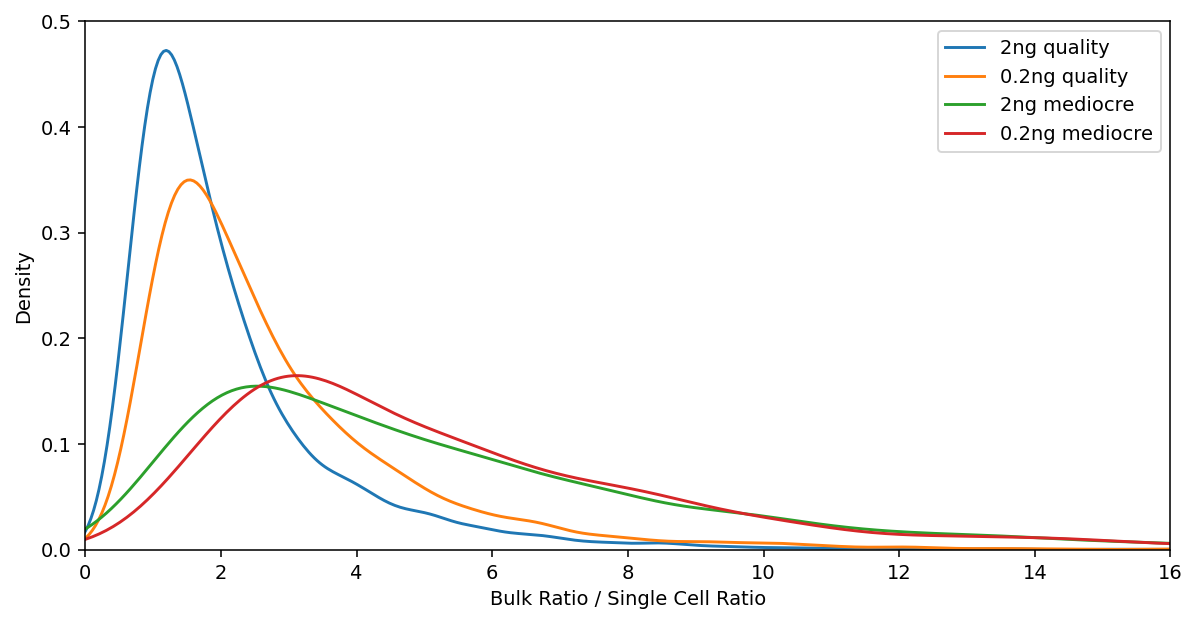

In [36]:
plt.rcParams["figure.dpi"] = 140
ax = kde_df.plot.kde(figsize=(10, 5))
# fig = plt.figure(dpi=360)
ax.set_xlim(-1, 17)
ax.set_title("")
# plt.xticks(list(range(-7,12)))
plt.xlim(0,16)
plt.ylim(0,0.5)
plt.xlabel('Bulk Ratio / Single Cell Ratio')
fig1 = plt.gcf()

#The ratio interpretaion is that a 2 means that the intensity difference is 2 times more extreme in bulk data. 
#The closer the ratio is to 0 the more the sc intensity difference looks like the bulk intensity difference

In [22]:
fig1.savefig('intensity_range.jpg')

# Get peptides to annotate

In [23]:
# bulk_rep1 = dl.load_joined_psm_mzml('bulk_rep1')[['scan','peptide','minute','Matched Ion Intensities','probability']]
# rep3_2ng = dl.load_joined_psm_mzml("2ng_rep3")[['scan','peptide','minute','Matched Ion Intensities','probability']]
rep6_2ng = dl.load_joined_psm_mzml("2ng_rep6")[['scan','peptide','minute','Matched Ion Intensities','probability']]



# bulk_rep1 = get_intensity_diff(bulk_rep1)
# rep3_2ng = get_intensity_diff(rep3_2ng)
rep6_2ng = get_intensity_diff(rep6_2ng)



/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,20,21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [24]:
bulk_rep1[bulk_rep1['scan']==108797]

KeyError: 'scan'

In [ ]:
np.mean([1876.0, 1836.0, 1556.0])

In [ ]:
rep6_2ng[rep6_2ng['scan']==29708]

In [ ]:
rep6_2ng[rep6_2ng['scan']==29744]

In [ ]:
26.769107/4.911883

In [ ]:
26.769107/1.612946

In [ ]:
bulk_ann = bulk_df[bulk_df['probability']<=.01]

sc_ann = sc2ng_df[sc2ng_df['probability']<=.01]
sc_ann = sc_ann[(sc_ann['minute'] >= lower_limit) & (sc_ann['minute'] <=upper_limit)] #filter based on gradient



join_ann = join_df(sc_ann, bulk_ann)


In [ ]:
join_ann[['scan_df1', 'peptide_df1','intensity_diff_df1','intensity_diff_df2','scan_df2', 'peptide_df2']].head(70)

In [ ]:
47.625366 / 4.474423

In [ ]:
47.625366 / 1.621349